In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import torch.optim as optim

In [11]:
# Helper functions
def predict(X, W):
    b = np.ones((X.shape[0], 1))
    X = np.concatenate([X, b], axis = 1)
    YPred = X.dot(W)
    return YPred

def plot(X, Y, YPredict, label):
    plt.figure(figsize=(9, 6))
    plt.title(label)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X, Y,  color='black', label = 'Actual')
    plt.plot(X, YPredict, color='blue', linewidth=3, label = 'Prediction')
    plt.xticks(())
    plt.yticks(())
    plt.legend()
    plt.show()

In [12]:
# num_iterations = 5
# N = 10000
# D = 10

# X = np.random.randn(N, D)
# Y = np.random.randn(N, 1)

In [13]:
# print(X.shape)

In [14]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

In [15]:
#print(diabetes)

In [16]:
# diabetes_X_train = X[:-20]
# diabetes_X_test = X[-20:]
# diabetes_y_train = Y[:-20]
# diabetes_y_test = Y[-20:]

Mean squared error: 2553.13
Variance score: 0.47


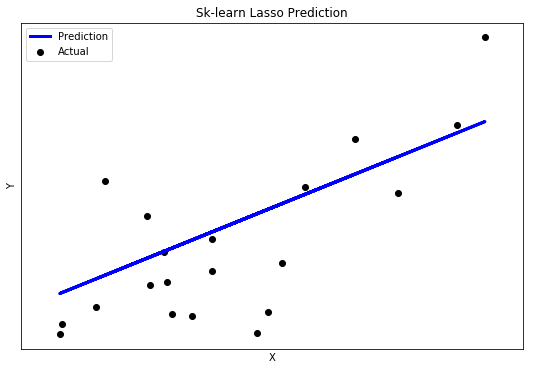

In [34]:
# Create linear regression object

alpha = 0.01
lasso = linear_model.Lasso(alpha=alpha, max_iter = 5)

diabetes_y_pred = lasso.fit(diabetes_X_train, diabetes_y_train).predict(diabetes_X_test)

# The coefficients
#print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plot(diabetes_X_test, diabetes_y_test, diabetes_y_pred, "Sk-learn Lasso Prediction")

In [27]:
X = diabetes_X_train
Y = diabetes_y_train

b = np.ones((X.shape[0], 1))
X = np.concatenate([X, b], axis = 1)
Y = Y.reshape(-1, 1)
admm = optim.ADMM([X, Y, 0.01, 1], "Lasso") #, parallel = True)

print(admm.getLoss())
for i in range(0, 50):
    print('Objective Value:', admm.step())

print('Weights: ',admm.getWeights())
W = admm.getWeights()

6272616.116787003
('Objective Value:', 983261.463164293)
('Objective Value:', 897668.6203126734)
('Objective Value:', 868007.8413340384)
('Objective Value:', 856511.319478526)
('Objective Value:', 851592.7846565667)
('Objective Value:', 849327.9824983742)
('Objective Value:', 848234.7107673415)
('Objective Value:', 847692.2511785958)
('Objective Value:', 847418.9980950987)
('Objective Value:', 847280.2432261793)
('Objective Value:', 847209.4891767501)
('Objective Value:', 847173.3318901183)
('Objective Value:', 847154.8338783506)
('Objective Value:', 847145.3648987642)
('Objective Value:', 847140.5163812094)
('Objective Value:', 847138.0333613176)
('Objective Value:', 847136.7616604941)
('Objective Value:', 847136.1103217956)
('Objective Value:', 847135.7767129098)
('Objective Value:', 847135.6058401458)
('Objective Value:', 847135.5183195255)
('Objective Value:', 847135.4734915516)
('Objective Value:', 847135.4505306758)
('Objective Value:', 847135.4387701137)
('Objective Value:', 847

In [9]:
print(X.shape, Y.shape)

((422, 2), (422, 1))


In [28]:
# Comparison with Scikit - LR
admm_predict = predict(diabetes_X_test, W)

In [11]:
print(Y.shape, admm_predict.shape,diabetes_y_test.shape )

((422, 1), (20, 1), (20,))


In [29]:
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, admm_predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, admm_predict))

Mean squared error: 2715.73
Variance score: 0.44


Mean squared error: 2769.15
Variance score: 0.43


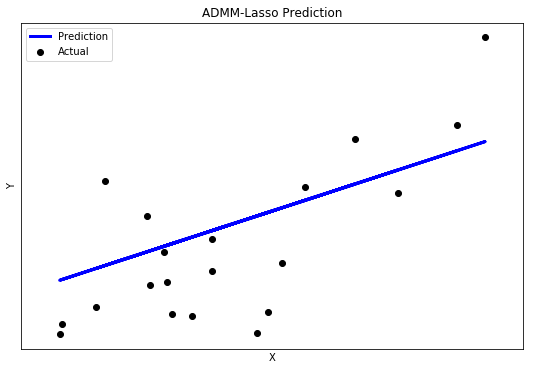

In [26]:
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, admm_predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, admm_predict))
plot(diabetes_X_test, diabetes_y_test, admm_predict, "ADMM-Lasso Prediction")

Mean squared error: 2559.32
Variance score: 0.47


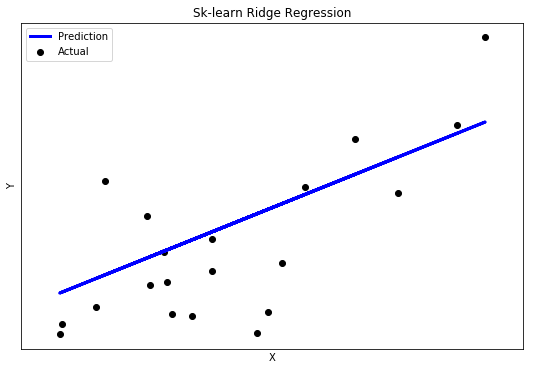

In [43]:
ridge = linear_model.Ridge(alpha=alpha)
ridge.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = ridge.predict(diabetes_X_test)
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plot(diabetes_X_test, diabetes_y_test, diabetes_y_pred, "Sk-learn Ridge Regression")

In [44]:
import numpy as np
import multiprocessing
from multiprocessing import Pool


class ADMM(object):
    """
    min f(x) + g(z)
    s.t. Ax + Bz = c
    """
    def __init__(self, A, b, lamb, rho, parallel=False):
        self.A = A
        self.b = b
        self.lamb = lamb
        self.rho = rho
        self.z = np.zeros((A.shape[0], 1))
        self.parallel = parallel
        if self.parallel:
            self.x = np.zeros((A.shape[1], A.shape[0]))
            self.nu = np.zeros((A.shape[1], A.shape[0]))
            self.x_bar = np.mean(self.x, 0).reshape(-1 , 1)
            self.nu_bar = np.mean(self.nu, 0).reshape(-1 , 1)
            self.num_cores = multiprocessing.cpu_count()
        else:
            self.x = np.zeros((A.shape[0], 1))
            self.nu = np.zeros((A.shape[0], 1))

    def update(self):
        if self.parallel:
            self.update_parallel()
        else:
            self.update_serial()

    def getparam(self):
        if self.parallel:
            return self.x_bar
        return self.x

    def get_diff(self):
        if self.parallel:
            print(self.x_bar - self.z)
        else:
            print(self.x - self.z)

    def update_one_x(self, i):
        self.x[i] = (self.A[:, i] * self.b[i] + self.rho * self.z.reshape(-1) - self.nu[i]) / (self.A[:, i].dot(self.A[:, i].T) + self.rho)

    def update_one_nu(self, i):
        self.nu[i] = self.nu[i] + (self.rho * (self.x[i] - self.z.reshape(-1)))

    def update_parallel(self):
        p = Pool(self.num_cores)
        p.map(self.update_one_x, range(self.A.shape[1]))
        # Parallel(n_jobs=self.num_cores)(delayed()(i) for i in range(self.A.shape[1]))
        self.x_bar = np.mean(self.x, 0).reshape(-1 , 1)
        # self.z = (self.x_bar + self.nu_bar / self.rho) - (self.lamb / self.rho) * np.sign(self.z)
        self.z = (self.rho * self.x_bar + self.nu_bar) / (self.rho + 2 * self.lamb)
        p.map(self.update_one_nu, range(self.A.shape[1]))
        # Parallel(n_jobs=self.num_cores)(delayed(self.update_one_nu)(i) for i in range(self.A.shape[1]))
        self.nu_bar = np.mean(self.nu, 0).reshape(-1 , 1)

    def update_serial(self):
        self.x = np.linalg.inv(self.A.dot(self.A.T) + self.rho).dot(self.A.dot(self.b) + self.rho * self.z - self.nu)
        # self.z = (self.x + self.nu)*(self.rho/(2*self.lamb + self.rho))
        self.z = (self.rho * self.x + self.nu) / (self.rho + 2 * self.lamb)
        self.nu = self.nu + self.rho * (self.x - self.z)

def obj_func(A, x, b, lamb):
    return 0.5 * np.linalg.norm(A.T.dot(x) - b) ** 2 + lamb * (np.linalg.norm(x)**2)

In [46]:
X = diabetes_X_train
Y = diabetes_y_train

b = np.ones((X.shape[0], 1))
X = np.concatenate([X, b], axis = 1)
Y = Y.reshape(-1, 1)
admm = ADMM(X.T, Y, alpha, 1)

#optim.ADMM([X, Y, 0.01], "Lasso") #, parallel = True)

#print(admm.getLoss())
for i in range(0, 5):
    admm.update()

print('Weights: ',admm.getparam())
W = admm.getparam()

('Weights: ', array([[738.13112889],
       [151.25737136]]))


In [47]:
# Comparison with Scikit - LR
admm_predict = predict(diabetes_X_test, W)

Mean squared error: 2799.13
Variance score: 0.42


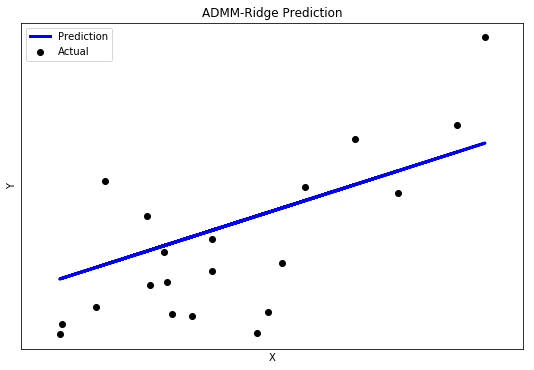

In [49]:
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, admm_predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, admm_predict))
plot(diabetes_X_test, diabetes_y_test, admm_predict, "ADMM-Ridge Prediction")